___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part -1<br><br>Univariate Time Series Forecasting with RNN<br><br>RSCCASN<br><h1>

# RNN (Time Series)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [8]:
df = pd.read_csv('RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [9]:
df.head()

# timeseries ile calisirken tarihi index'e almak gerekir

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [11]:
df.columns = ['Sales']

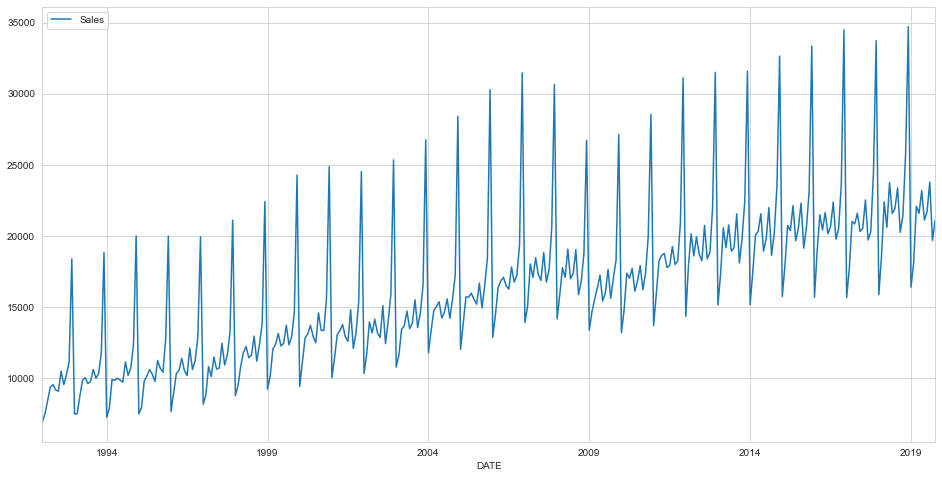

In [12]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [13]:
len(df)

334

In [14]:
test_size = 24

# benim buradaki periyodum 12 oldugu icin test datami ondan daha buyuk secmem lazim
# bu sebeple 24 olarak belirledik

In [15]:
test_ind = len(df)- test_size
test_ind

310

In [16]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [17]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [18]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


### Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
# help(TimeseriesGenerator)

In [23]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, 
                                batch_size = batch_size)

In [24]:
len(generator)

# 310-12

298

In [25]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [26]:
X, y = generator[0]

In [27]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


## Modelling

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [29]:
n_features = train_scaled.shape[1]

In [32]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, 
               input_shape = (length, n_features)))
# ilk hidden layer sonrasinda bir tane daha hidden layer koyacaksam return_sequences=True
# yazmak zorundayim
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

# tanh yerine relu da olabilir, relu'yu da dene, birkac defa denemekte fayda var

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [36]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [38]:
4 * ((100+1)*50+(50**2))

30200

### EarlyStopping and Validation Generator

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [52]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, 
                                           batch_size = batch_size)

In [53]:
len(validation_generator)

12

In [54]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
298/298 [==============================] - 5s 15ms/step - loss: 0.0022 - val_loss: 0.0062
Epoch 2/20
298/298 [==============================] - 5s 17ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 3/20
298/298 [==============================] - 5s 17ms/step - loss: 0.0024 - val_loss: 0.0068
Epoch 4/20
298/298 [==============================] - 6s 19ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 5/20
298/298 [==============================] - 6s 19ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 6/20
298/298 [==============================] - 6s 20ms/step - loss: 0.0019 - val_loss: 6.1767e-04
Epoch 7/20
298/298 [==============================] - 5s 16ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 8/20
298/298 [==============================] - 5s 17ms/step - loss: 0.0018 - val_loss: 0.0069
Epoch 9/20
298/298 [==============================] - 5s 17ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 10/20
298/298 [==============================] - 6s 18ms/step - loss: 0.0018 - va

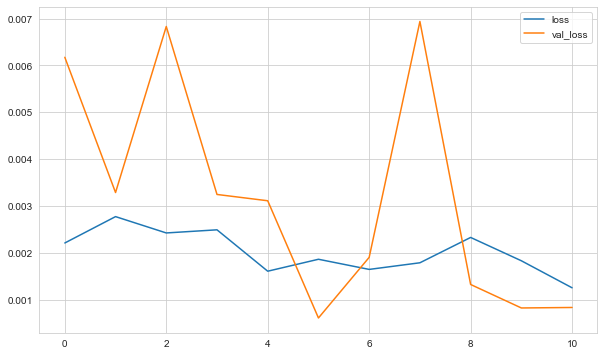

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## Evaluate on Test Data

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [58]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:] # train setimin sonundan 12'li bir batch sec
current_batch = first_eval_batch.reshape((1, length, n_features)) # modele girecek hale getir

for i in range(length): # length kadar prediction yaptirmak istiyorum
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    # buradan cikan sonuc 2 boyutlu array oldugu icin indexleme yapiliyor asagida
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [59]:
predictions_scaled

[array([0.6217742], dtype=float32),
 array([1.0071448], dtype=float32),
 array([0.36069682], dtype=float32),
 array([0.43507144], dtype=float32),
 array([0.5234488], dtype=float32),
 array([0.5238828], dtype=float32),
 array([0.5379362], dtype=float32),
 array([0.50560766], dtype=float32),
 array([0.51508605], dtype=float32),
 array([0.5399242], dtype=float32),
 array([0.47151244], dtype=float32),
 array([0.49637374], dtype=float32)]

In [60]:
eval_metrics(test_scaled[:length], predictions_scaled)

# yaptigimiz prediction'lari kiyaslayabilecegimiz gercek degerler test datamizin en basindaki
# length kadar olan deger oldugu icin onunla kiyasliyorum

r2_score: 0.9388145610563421 
mae: 0.0325455353088134 
mse: 0.001355099947252896 
rmse: 0.03681168221166884


### Inverse Transformations and Comparing

In [61]:
predictions = scaler.inverse_transform(predictions_scaled)

In [62]:
compare = test[:12]

In [63]:
compare['Predictions'] = predictions

In [64]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,24064.148
2017-12-01,33720,34678.797
2018-01-01,15881,16873.033
2018-02-01,18585,18921.608
2018-03-01,22404,21355.874
2018-04-01,20616,21367.828
2018-05-01,23764,21754.915
2018-06-01,21589,20864.458
2018-07-01,21919,21125.530


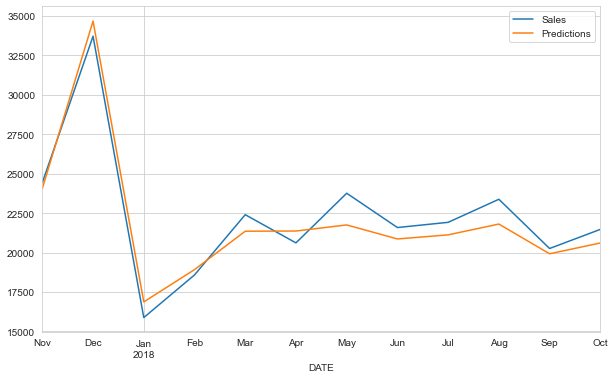

In [66]:
compare.plot();

In [67]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.9388145610563419 
mae: 896.4342245459571 
mse: 1028076.3004558552 
rmse: 1013.9409748382078


## Retrain and Forecasting

In [69]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

# simdi butun datamla egitim yapiyorum ve o sekilde tahmin yapacagim

In [70]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, 
                                batch_size = batch_size)

In [71]:
len(df)

334

In [72]:
len(generator)

322

In [73]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, 
               input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 9s 14ms/step - loss: 0.0230
Epoch 2/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0201
Epoch 3/15
322/322 [==============================] - 5s 16ms/step - loss: 0.0191
Epoch 4/15
322/322 [==============================] - 5s 16ms/step - loss: 0.0170
Epoch 5/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0189
Epoch 6/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0171
Epoch 7/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0155
Epoch 8/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0156
Epoch 9/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0145
Epoch 10/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0122
Epoch 11/15
322/322 [==============================] - 5s 15ms/step - loss: 0.0146
Epoch 12/15
322/322 [==============================] - 5s 14ms/step - loss: 0.0121
Epoch 13/15
3

In [ ]:
# Bu sefer validation datam olmadigi icin early stop koymadik

In [74]:
scaled_full_data.shape

(334, 1)

In [75]:
scaled_full_data[-length:].shape

(12, 1)

In [76]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [77]:
forecast = scaler.inverse_transform(forecast)

In [78]:
forecast

array([[32280.7214489 ],
       [37405.53377628],
       [17738.4680109 ],
       [20811.89523458],
       [24775.42695427],
       [24080.56433344],
       [24110.29479027],
       [21854.04387093],
       [22245.02507162],
       [22757.75847721],
       [22048.46487093],
       [26245.91153669]])

In [79]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [80]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

# frequency month olmasi gerektigi icin MS yazildi. Hafta icin asagidaki linki kullan

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [81]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [82]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [83]:
forecast_df

,Forecast
2019-11-01,32280.721
2019-12-01,37405.534
2020-01-01,17738.468
2020-02-01,20811.895
2020-03-01,24775.427
2020-04-01,24080.564
2020-05-01,24110.295
2020-06-01,21854.044
2020-07-01,22245.025
2020-08-01,22757.758


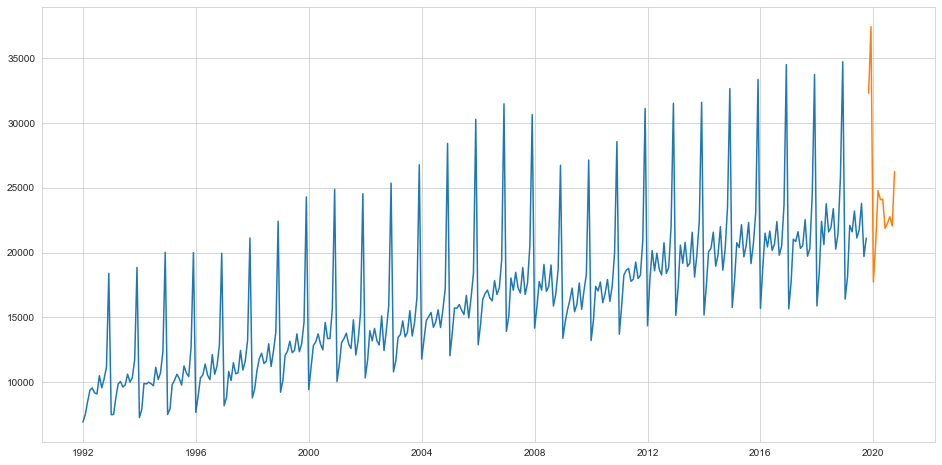

In [84]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast']);

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

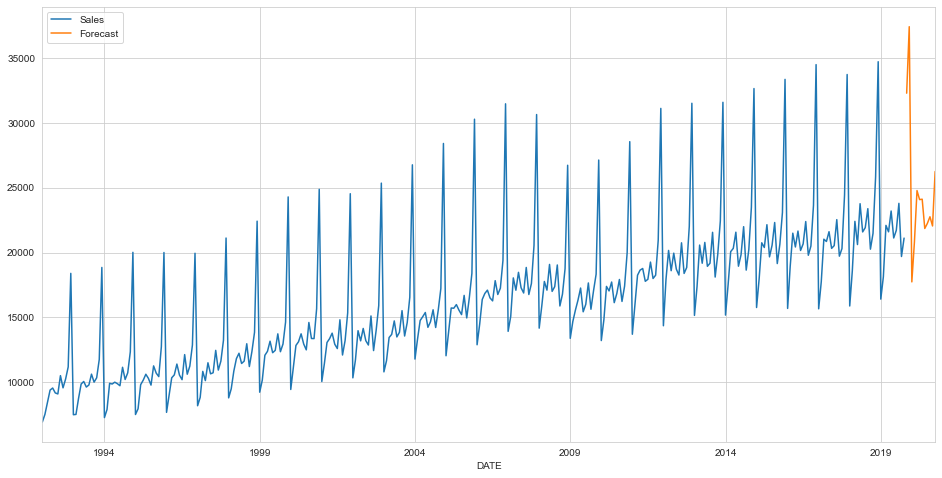

In [85]:
# yukaridaki figure'u olusturmanin ikinci bir yolu

ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

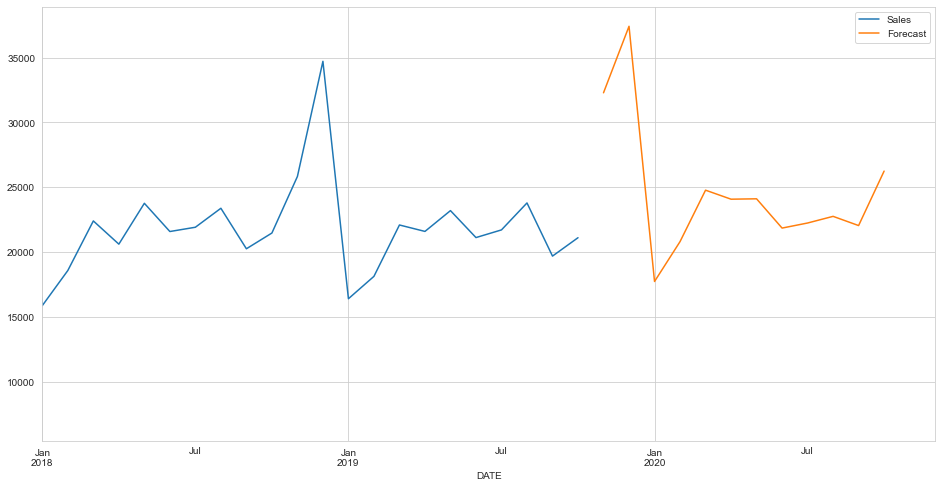

In [86]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01');

In [88]:
dataset_total = pd.concat((df['Sales'], forecast_df['Forecast']), axis=0)

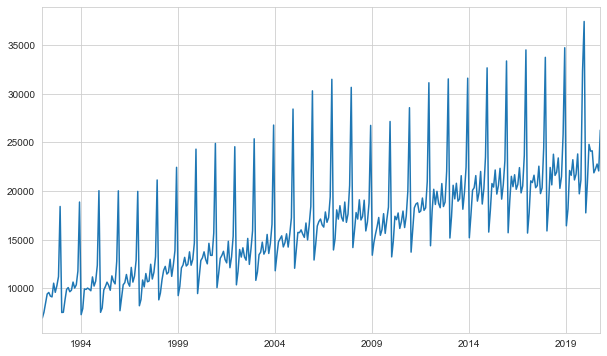

In [90]:
dataset_total.plot();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___